In [1]:
import os
import tempfile

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
from matplotlib import cm, colors
import scanpy as sc
import pandas as pd
import seaborn as sb
import scipy as sp
import numpy as np
import torch
from rich import print


# Define the path to the directory you want to change to
new_directory = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
from matplotlib import cm, colors

# Define a nice color map for gene expression
colors2 = plt.cm.PuRd(np.linspace(0, 1, 128))  # Use PuRd color map for deep red/purple color
colors3 = plt.cm.Greys_r(np.linspace(0.7, 0.8, 20))  # Greys for low values
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [3]:
#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
plt.rcParams['figure.figsize']=(5,5) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=True, fontsize=12) #color_map=mymap2)
sc.settings.figdir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/figures_all/'
sc.logging.print_header()

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


# Microglia

In [5]:
plt.rcParams['figure.figsize']=(5,5) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=True, fontsize=12) #color_map=mymap2)
sc.settings.figdir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/figures_MG/'
sc.logging.print_header()

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


In [6]:
adata_mg = sc.read_h5ad('/scratch365/eaboelno/BACKUP_h5ad_IMPORTANT/scVI_mdata_MG_working.h5ad')
adata_mg

AnnData object with n_obs × n_vars = 37619 × 29040
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 's_score', 'g2m_score', 'phase', 'cell_cycle_diff', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'pct_counts_ribo', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'Cycling cells', 'Cycling_cells', 'Microglia', 'DAM', 'Macrophages', 'BAM', 'Monocytes', 'DCs

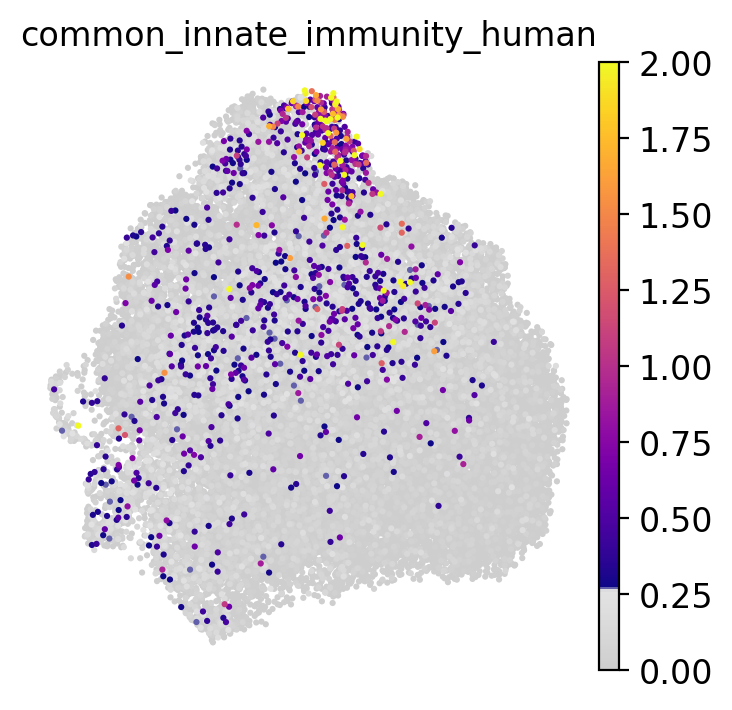

In [7]:
#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata_mg, color=['common_innate_immunity_human'],legend_fontsize =float(12), \
           cmap=mymap2, vmin=0, vmax=2, 
           legend_fontweight= 'normal', frameon= False, s=20)

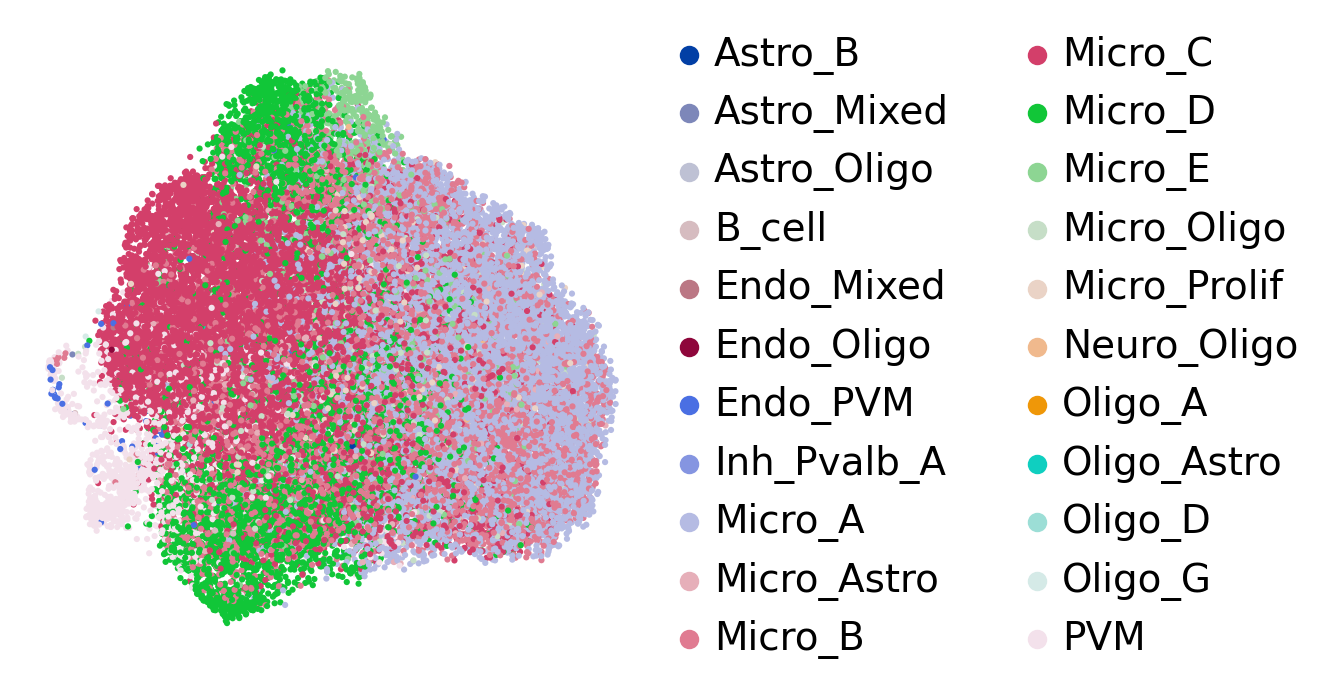

In [7]:
#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata_mg, color=['type_fine'], legend_fontsize =float(14) , wspace=0.6, 
           cmap=mymap2,s=20,
           legend_fontweight= 'bold', title='', frameon= False , 
           legend_fontoutline=1) # save='_human_scVI_integration_MG_cell_type_lettered.png')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_type_fine']`


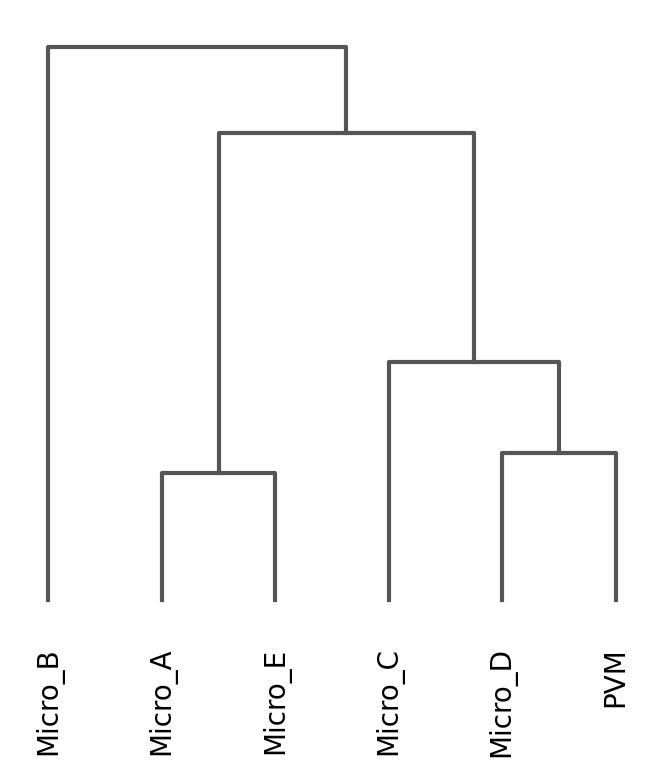

<Axes: >

In [19]:
sc.tl.dendrogram(adata_mg_sub, 'type_fine')
sc.pl.dendrogram(adata_mg_sub, 'type_fine')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_MG_NEW_types']`


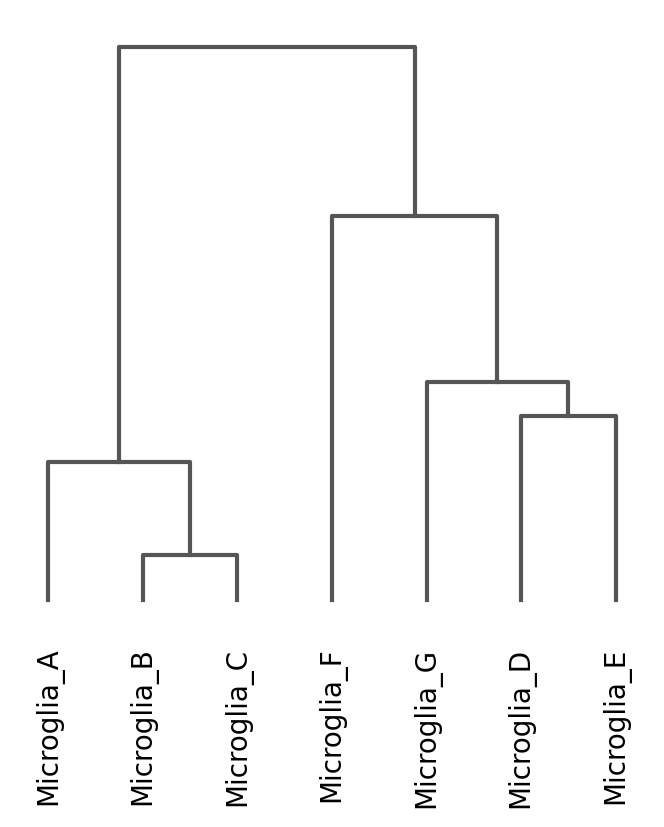

<Axes: >

In [20]:
sc.tl.dendrogram(adata_mg, 'MG_NEW_types')
sc.pl.dendrogram(adata_mg, 'MG_NEW_types')

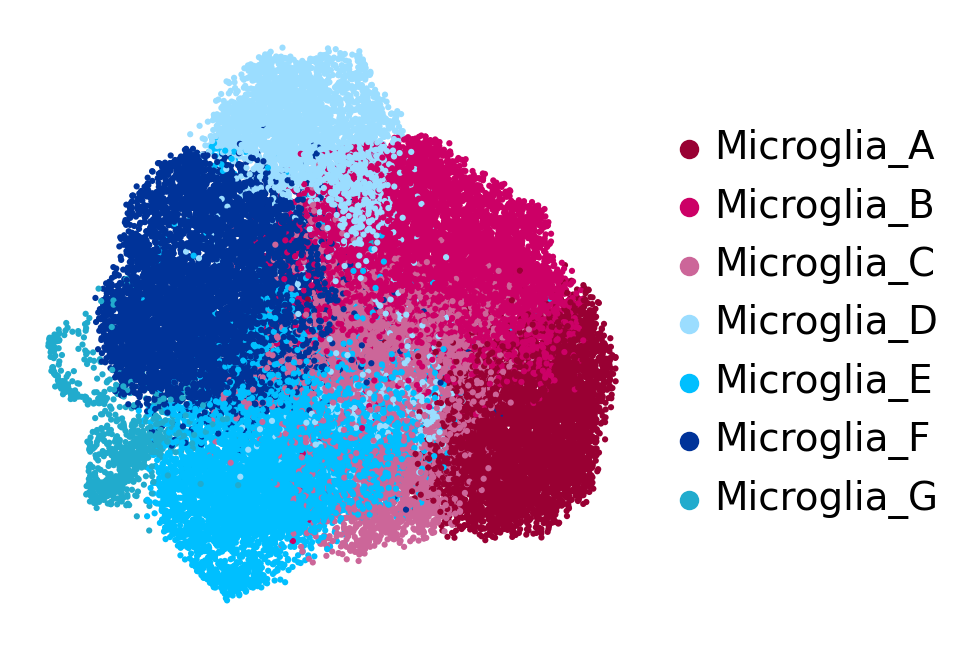

In [32]:
#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata_mg, color=['MG_NEW_types'], legend_fontsize =float(14) , wspace=0.6, 
           cmap=mymap2,s=20,
           legend_fontweight= 'bold', title='', frameon= False , 
           legend_fontoutline=1, save='_human_scVI_integration_MG_cell_type_lettered.png')

In [14]:
cluster_1_annotation = {
    'Microglia_A': 'Mg_A',
    'Microglia_B': 'Mg_B',
    'Microglia_C': 'Mg_C',
    'Microglia_D': 'Mg_D',
    'Microglia_E': 'Mg_E',
    'Microglia_F': 'Mg_F',
    'Microglia_G': 'Mg_G',
}

adata_mg.obs['MG_NEW_types_abbrev'] = adata_mg.obs['MG_NEW_types'].map(cluster_1_annotation).astype('category')

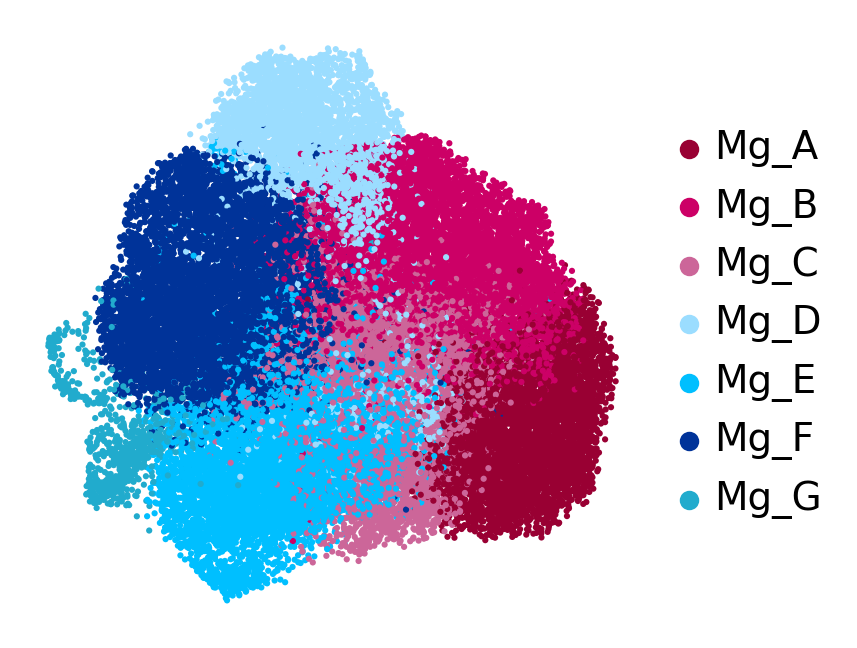

In [15]:
cluster_color_leiden = {
    'Mg_A': '#990033', 
    'Mg_E': '#00bfff', 
    'Mg_F': '#003399', 
    'Mg_D': '#9bddff', 
    'Mg_B': '#cc0066', 
    'Mg_C': '#cc6699',
    'Mg_G': '#21abcd',
}

# Define the desired order of cell types in the legend
desired_order = ['Mg_A', 'Mg_B', 'Mg_C', 'Mg_D', 'Mg_E', 
                 'Mg_F', 'Mg_G']

# Reorder the categories in the 'cell_type_fine_mm' column of adata_ol_ol
adata_mg.obs['MG_NEW_types_abbrev'] = pd.Categorical(adata_mg.obs['MG_NEW_types_abbrev'], 
                                                    categories=desired_order, 
                                                    ordered=True)

#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata_mg, color=['MG_NEW_types_abbrev'], legend_fontsize =float(14) , wspace=0.6, 
           cmap=mymap2,s=20,palette=cluster_color_leiden,
           legend_fontweight= 'bold', title='', frameon= False , 
           legend_fontoutline=1, save='_human_scVI_integration_MG_cell_type_abbrev.png')

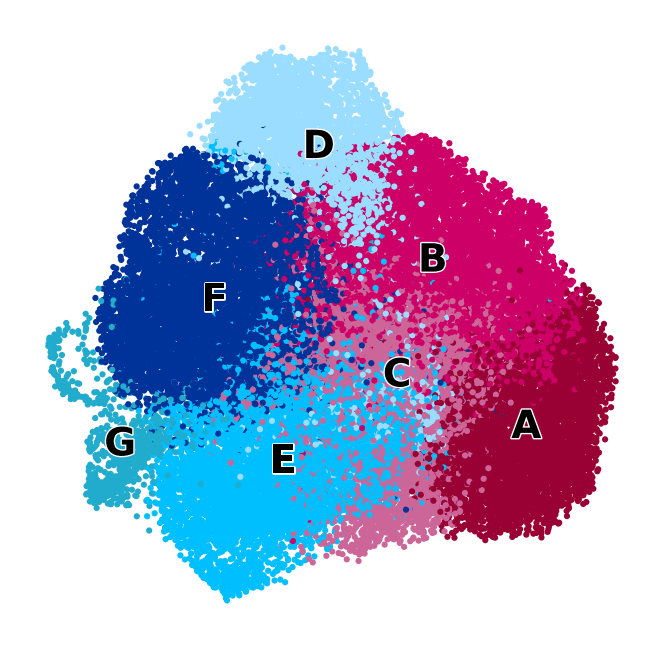

In [10]:
#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata_mg, color=['MG_NEW_types_lettered'], legend_fontsize =float(14) , wspace=0.6, 
           cmap=mymap2,s=20, legend_loc='on data',
           legend_fontweight= 'bold', title='', frameon= False , 
           legend_fontoutline=1, save='_human_scVI_integration_MG_cell_type_lettered.png')

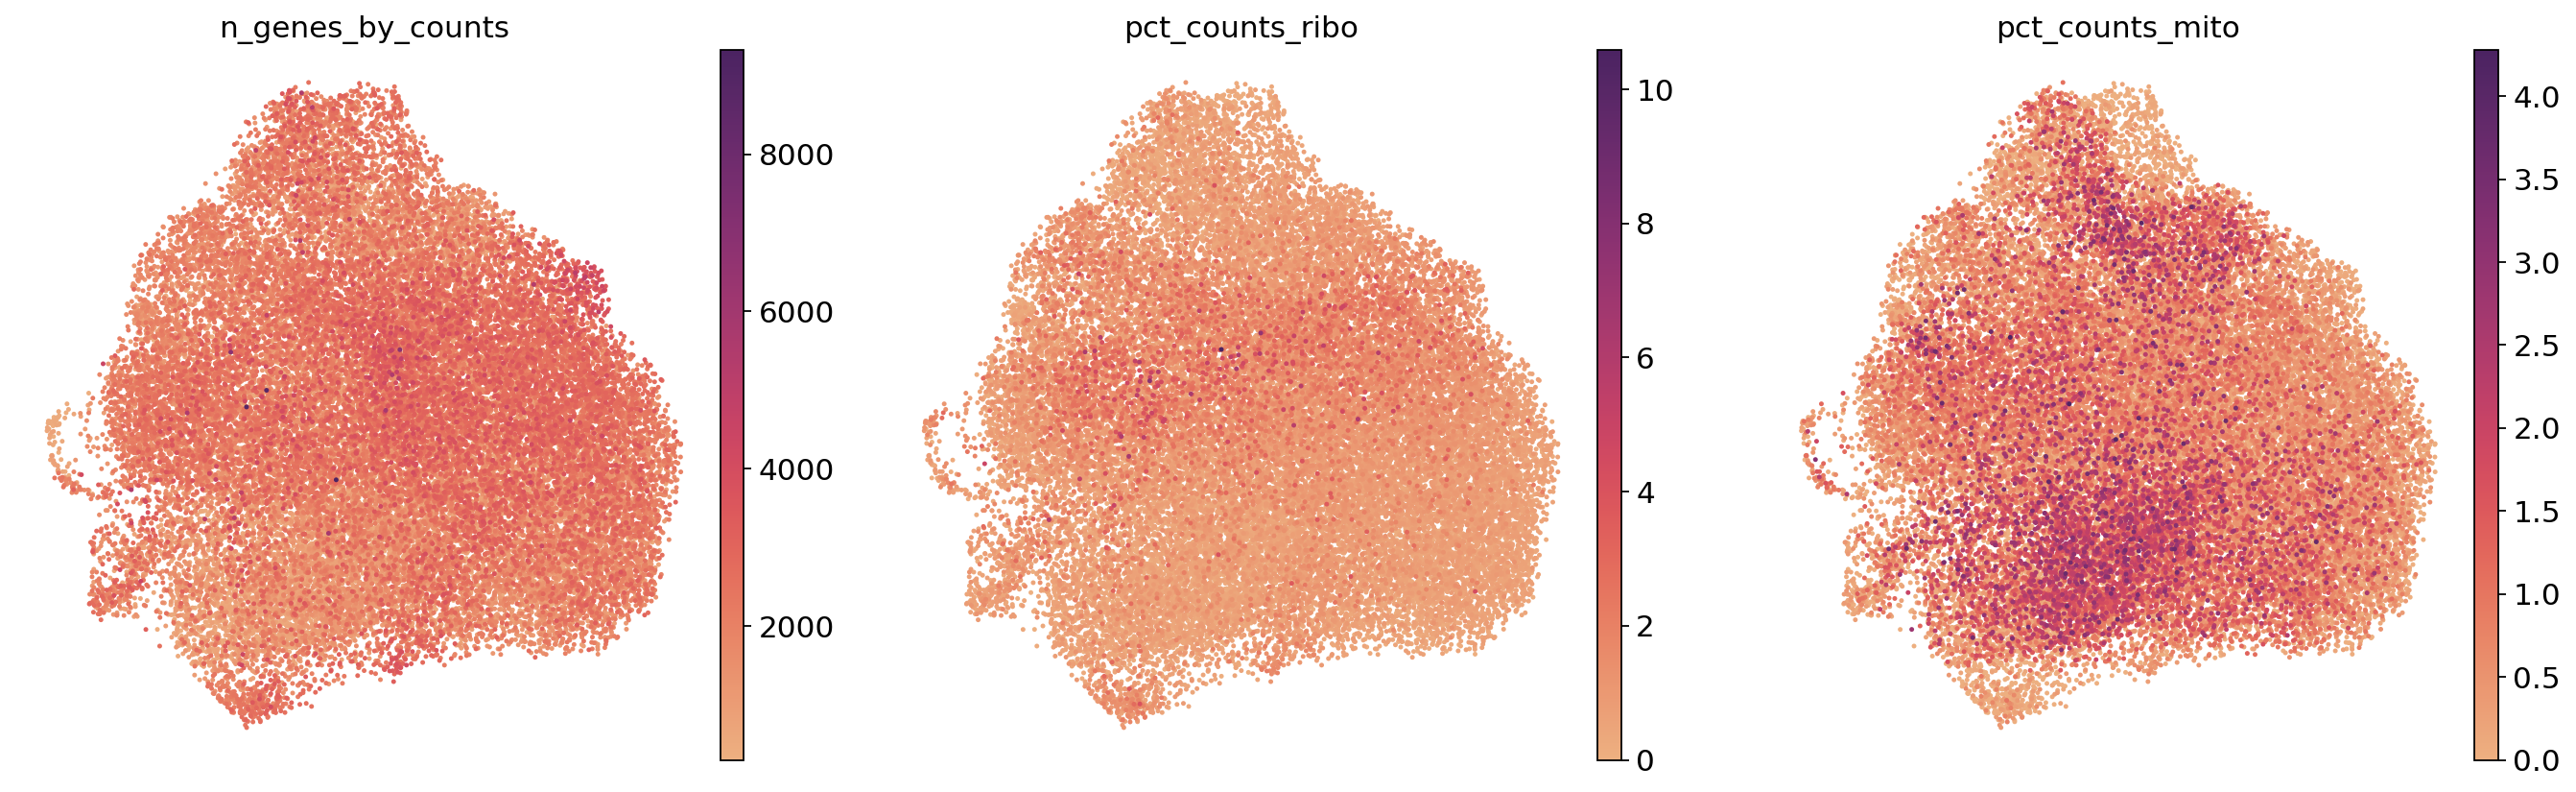

In [36]:
# Set figure parameters for high-resolution display and saving
sc.set_figure_params(dpi_save=300, figsize=(6, 6), transparent=True)

sc.pl.umap(adata_mg, color=['n_genes_by_counts', 
                         'pct_counts_ribo','pct_counts_mito'],
           cmap='flare',ncols=3, s=20, frameon=False,
          save='_Human_scVI_integration_QC_plots_MG_reduced.png')

In [38]:
adata_mg.obs['lesion_type'].value_counts()

lesion_type
AL      10101
CAL      9174
NAWM     5050
WM       4622
CIL      4438
RL       4234
Name: count, dtype: int64

In [39]:
MS_AL = sc.pp.subsample(adata_mg[adata_mg.obs['lesion_type']=='AL'],n_obs=4234,copy=True).obs_names
MS_NAWM = sc.pp.subsample(adata_mg[adata_mg.obs['lesion_type']=='NAWM'],n_obs=4234,copy=True).obs_names
MS_CAL = sc.pp.subsample(adata_mg[adata_mg.obs['lesion_type']=='CAL'],n_obs=4234,copy=True).obs_names
hs_WM = sc.pp.subsample(adata_mg[adata_mg.obs['lesion_type']=='WM'],n_obs=4234,copy=True).obs_names
MS_RL = sc.pp.subsample(adata_mg[adata_mg.obs['lesion_type']=='RL'],n_obs=4234,copy=True).obs_names
MS_CIL = sc.pp.subsample(adata_mg[adata_mg.obs['lesion_type']=='CIL'],n_obs=4234,copy=True).obs_names

In [40]:
adata_subsample = adata_mg[list(hs_WM) + list(MS_AL) + list(MS_NAWM) + list(MS_CAL) + list(MS_RL) +
                                list(MS_CIL) ].copy()

sc.tl.embedding_density(adata_subsample, basis='umap', groupby='lesion_type')

computing density on 'umap'
--> added
    'umap_density_lesion_type', densities (adata.obs)
    'umap_density_lesion_type_params', parameter (adata.uns)


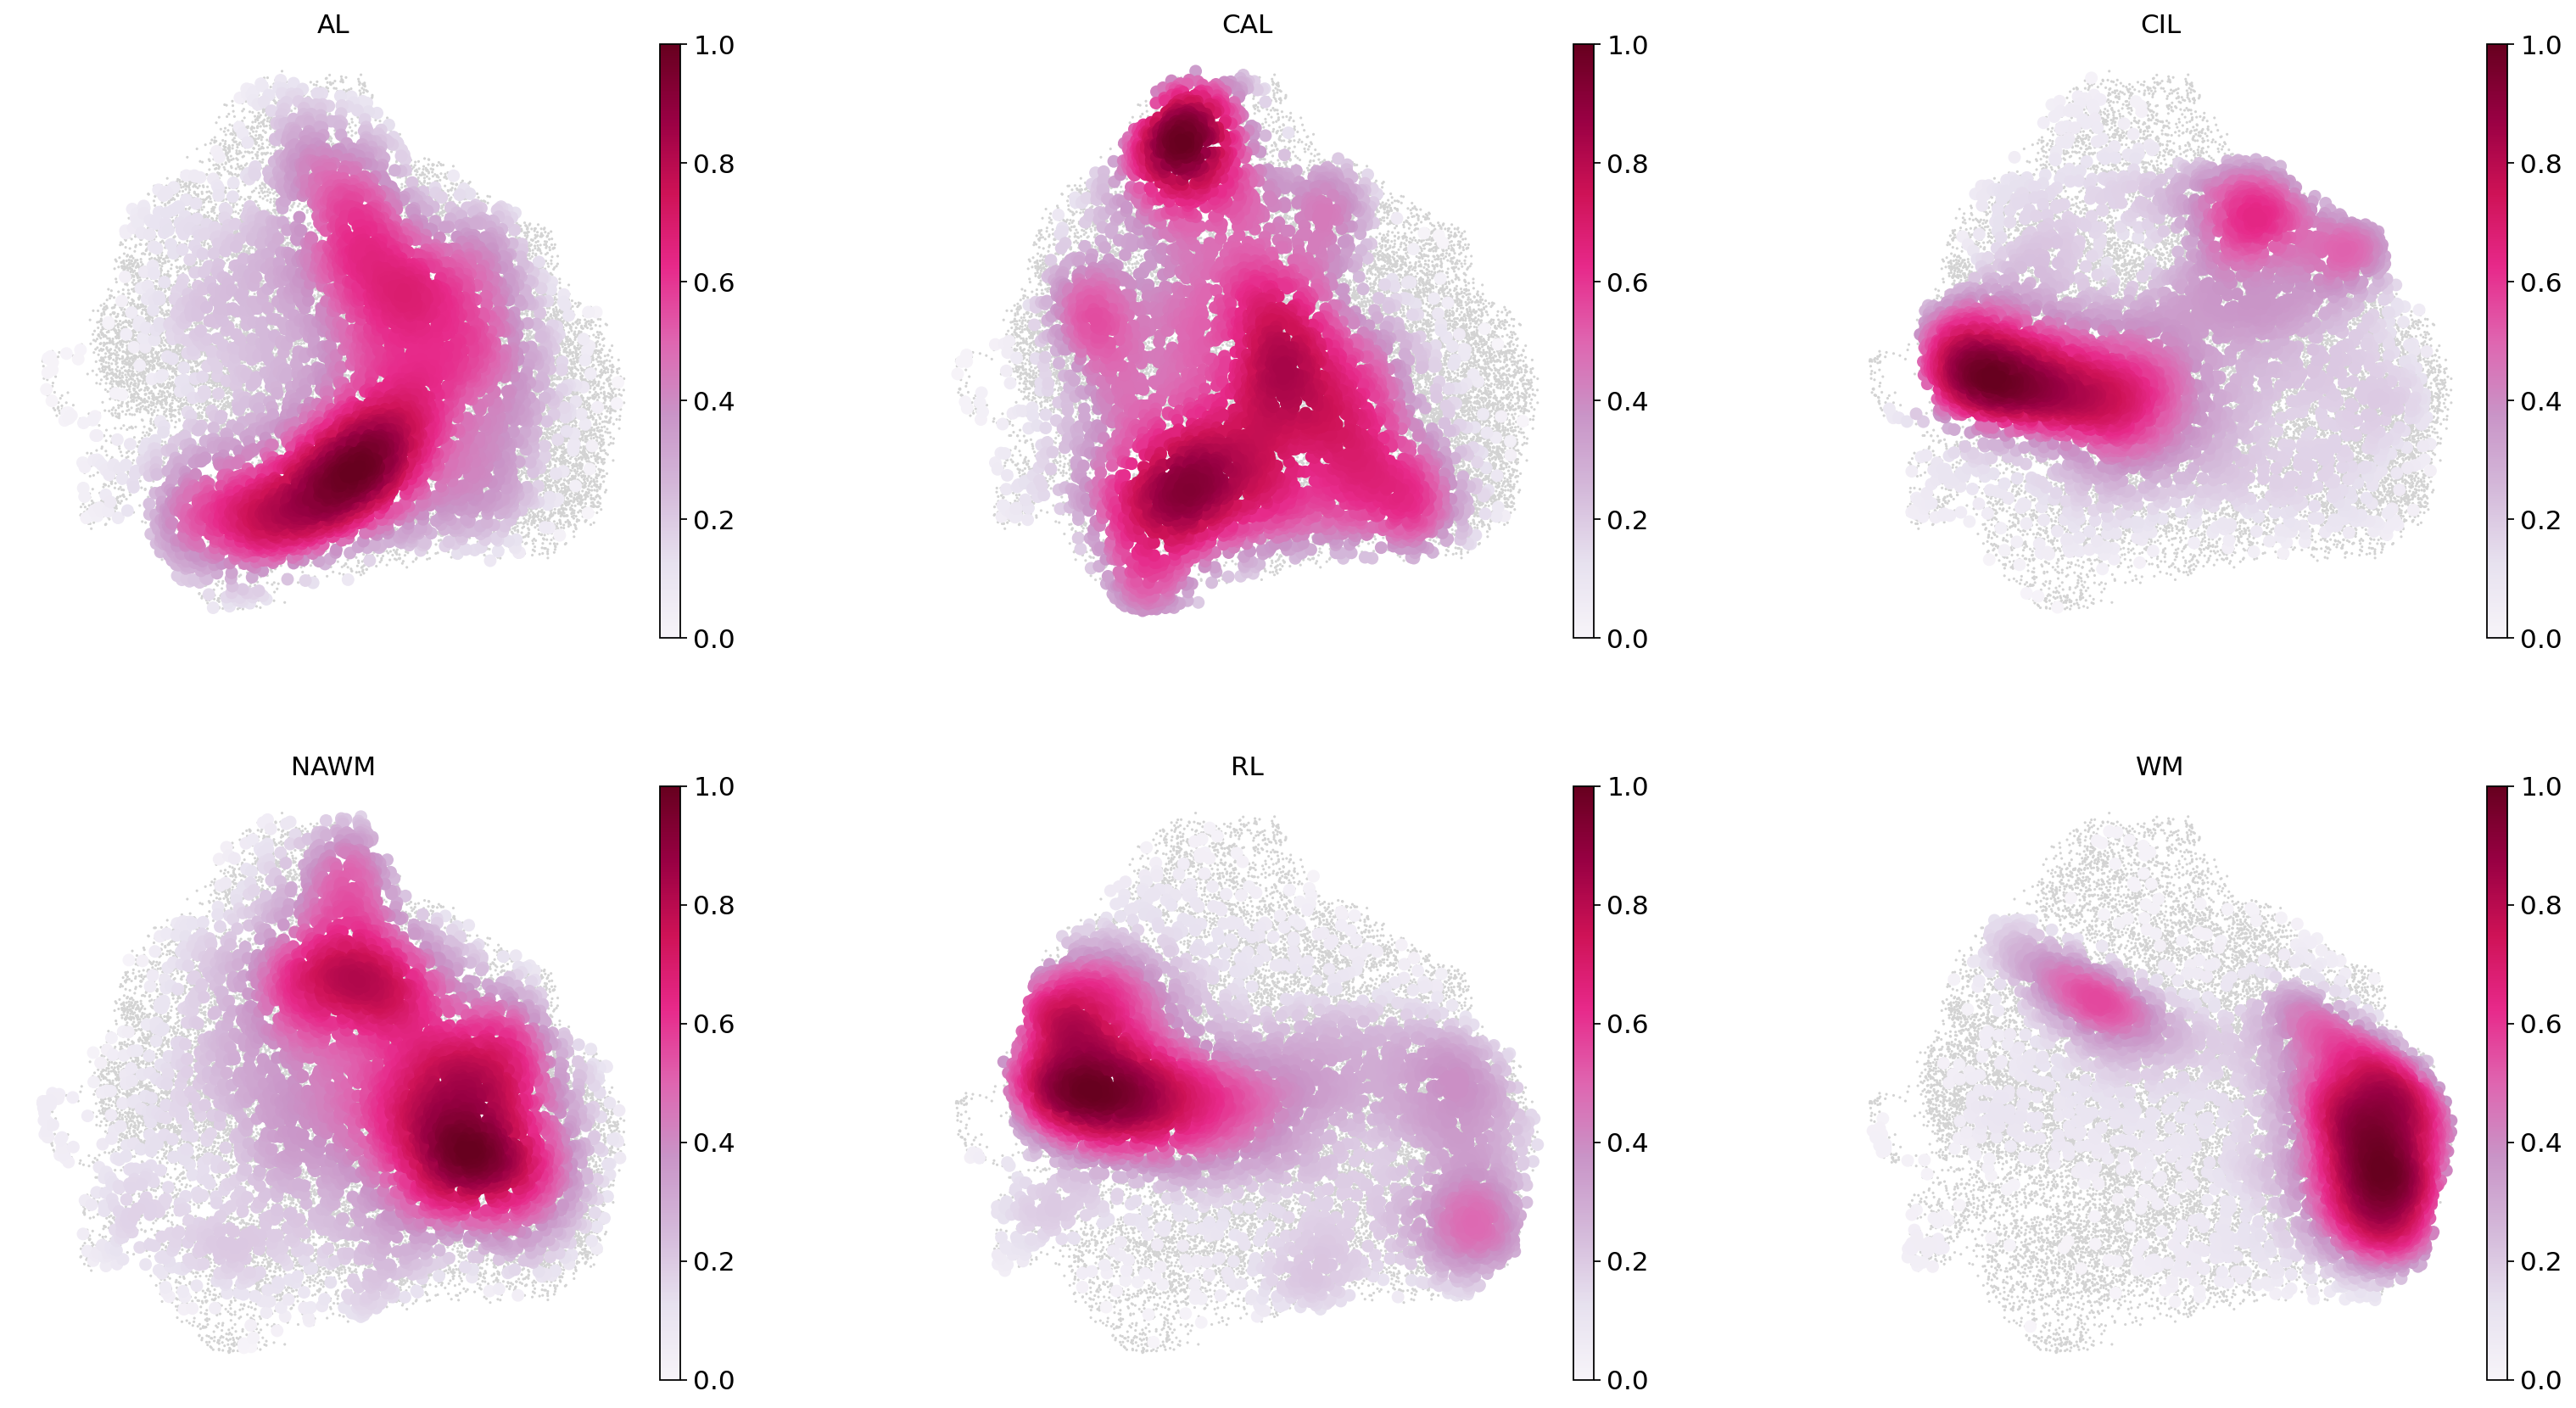

In [41]:
sc.pl.embedding_density(adata_subsample, basis='umap',  key='umap_density_lesion_type', 
                        color_map='PuRd', wspace=0.3, bg_dotsize = 8, frameon= False, ncols=3,
                       save='_Human_scVI_MG_lesion_density.png')

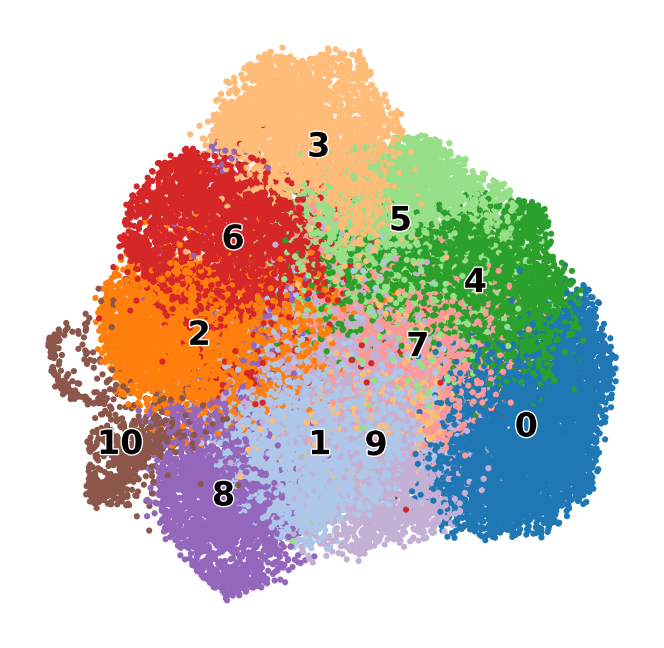

In [50]:
cluster_color_leiden = {
    '0': "#1f77b4",   # Blue
    '1': "#aec7e8",   # Light Blue
    '2': "#ff7f0e",   # Orange
    '3': "#ffbb78",   # Light Orange
    '4': "#2ca02c",   # Green
    '5': "#98df8a",   # Light Green
    '6': "#d62728",   # Red
    '7': "#ff9896",   # Light Red
    '8': "#9467bd",   # Purple
    '9': "#c5b0d5",   # Light Purple
    '10': "#8c564b",  # Brown
}


# Create a list of RGB tuples for the palette
palette_cell_type_fine = [cluster_color_leiden[cell_type] for cell_type in cluster_color_leiden.keys()]


#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata_mg, color=['leiden_MG_r1'], legend_fontsize =float(12) , wspace=0.6,
           palette=cluster_color_leiden,legend_loc='on data',
           legend_fontweight= 'bold', frameon= False , legend_fontoutline=1, s=20, 
           title='',
           save='_fine_MG_types_all_leiden.png')

In [9]:
#cell_type = {str(i): '' for i in range(18)}
cell_type = {
 '0': '0_Mg_A',
 '1': '1_Mg_E',
 '2': '2_Mg_F',
 '3': '3_Mg_D',
 '4': '4_Mg_B',
 '5': '5_Mg_B',
 '6': '6_Mg_F',
 '7': '7_Mg_C',
 '8': '8_Mg_E',
 '9': '9_Mg_C',
 '10': '10_Mg_G',
}

adata_mg.obs['MG_leiden_annotated'] = adata_mg.obs['leiden_MG_r1'].map(cell_type).astype('category')

In [10]:
# Define the desired order of cell types in the legend
desired_order = ['0_Mg_A', '1_Mg_E', '2_Mg_F', '3_Mg_D', '4_Mg_B', 
                 '5_Mg_B', '6_Mg_F', '7_Mg_C', '8_Mg_E',
                '9_Mg_C', '10_Mg_G']

# Reorder the categories in the 'cell_type_fine_mm' column of adata_ol_ol
adata_mg.obs['MG_leiden_annotated'] = pd.Categorical(adata_mg.obs['MG_leiden_annotated'], 
                                                    categories=desired_order, 
                                                    ordered=True)

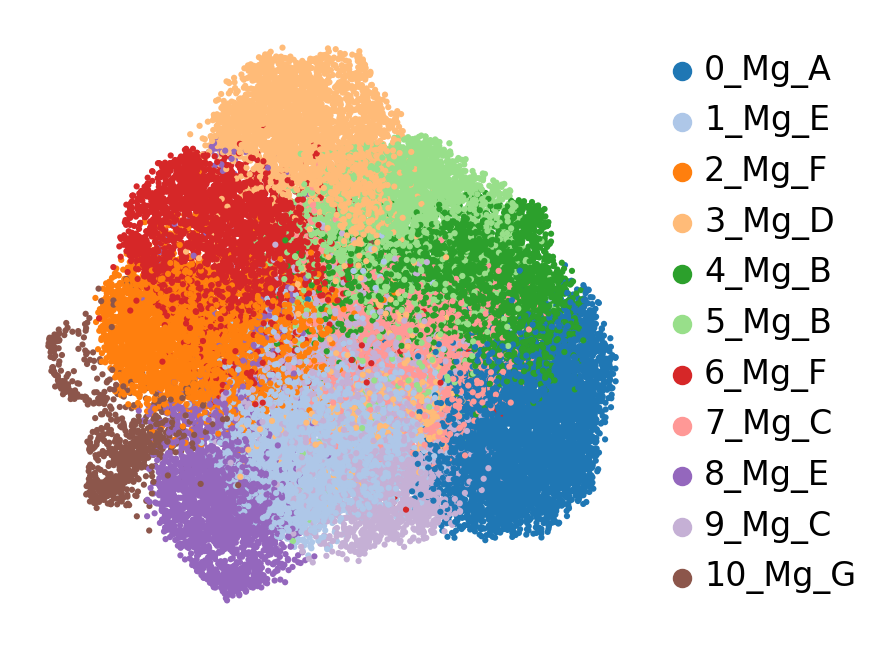

In [11]:
cluster_color_leiden = {
    '0_Mg_A': "#1f77b4",   # Blue
    '1_Mg_E': "#aec7e8",   # Light Blue
    '2_Mg_F': "#ff7f0e",   # Orange
    '3_Mg_D': "#ffbb78",   # Light Orange
    '4_Mg_B': "#2ca02c",   # Green
    '5_Mg_B': "#98df8a",   # Light Green
    '6_Mg_F': "#d62728",   # Red
    '7_Mg_C': "#ff9896",   # Light Red
    '8_Mg_E': "#9467bd",   # Purple
    '9_Mg_C': "#c5b0d5",   # Light Purple
    '10_Mg_G': "#8c564b",  # Brown
}

# Create a list of RGB tuples for the palette
palette_cell_type_fine = [cluster_color_leiden[cell_type] for cell_type in cluster_color_leiden.keys()]


#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata_mg, color=['MG_leiden_annotated'], legend_fontsize =float(12) , wspace=0.6,
           palette=cluster_color_leiden,
           legend_fontweight= 'bold', frameon= False , legend_fontoutline=1, s=20, 
           title='',
           save='_fine_MG_types_all_leiden_annotated.png')

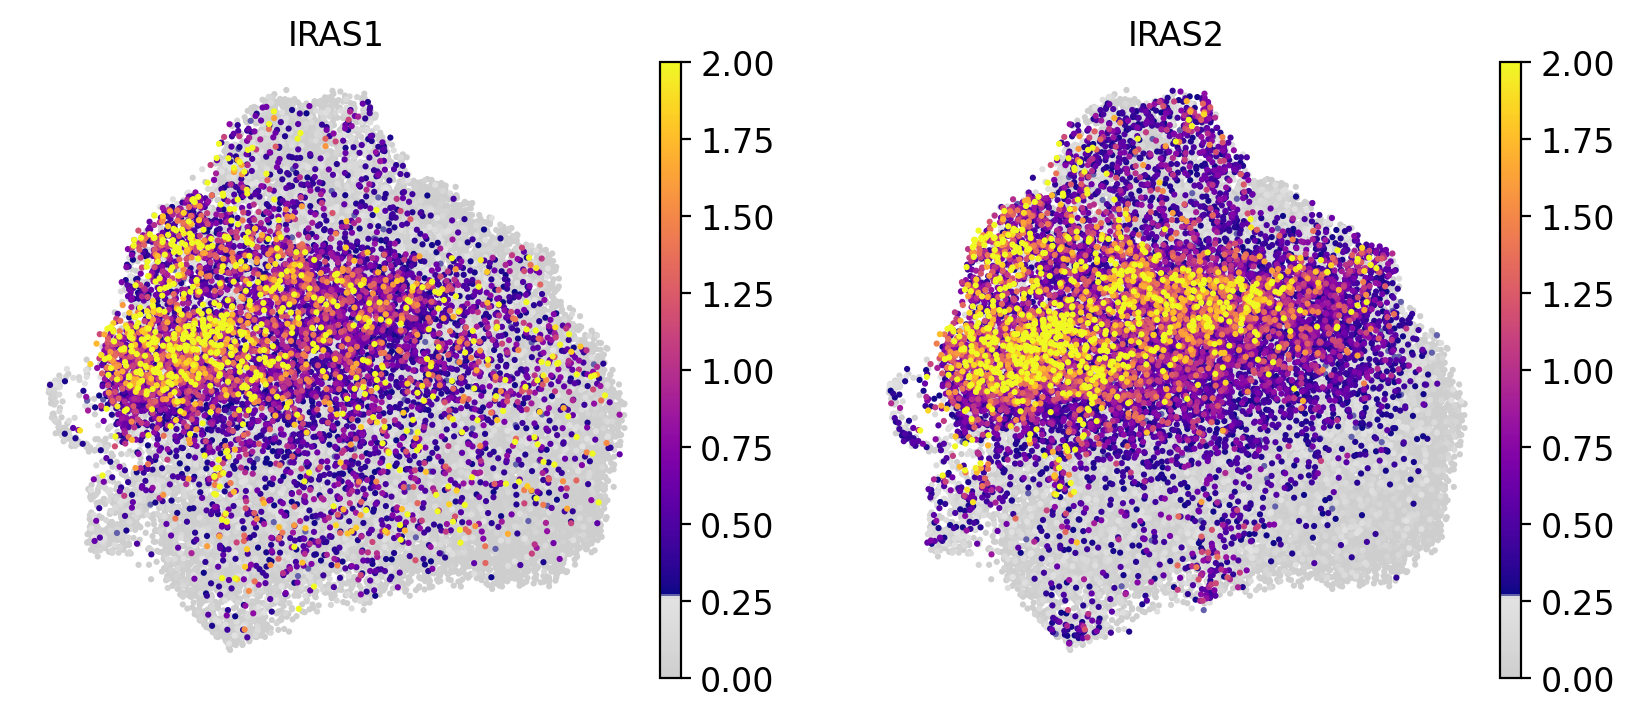

In [29]:
#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata_mg, color=['IRAS1', 'IRAS2'],legend_fontsize =float(12),
           cmap=mymap2, vmin=0, vmax=2, legend_fontweight= 'normal', frameon= False, s=20)
          #save=today+'_IRAS_scVI_MG.png')

In [12]:
# Define the desired order of lesion types
lesion_order = ["WM", "NAWM", "AL", "CAL", "CIL", "RL"]

# Convert lesion_type column to categorical with the specified order
adata_mg.obs['lesion_type'] = pd.Categorical(
    adata_mg.obs['lesion_type'], 
    categories=lesion_order, 
    ordered=True
)

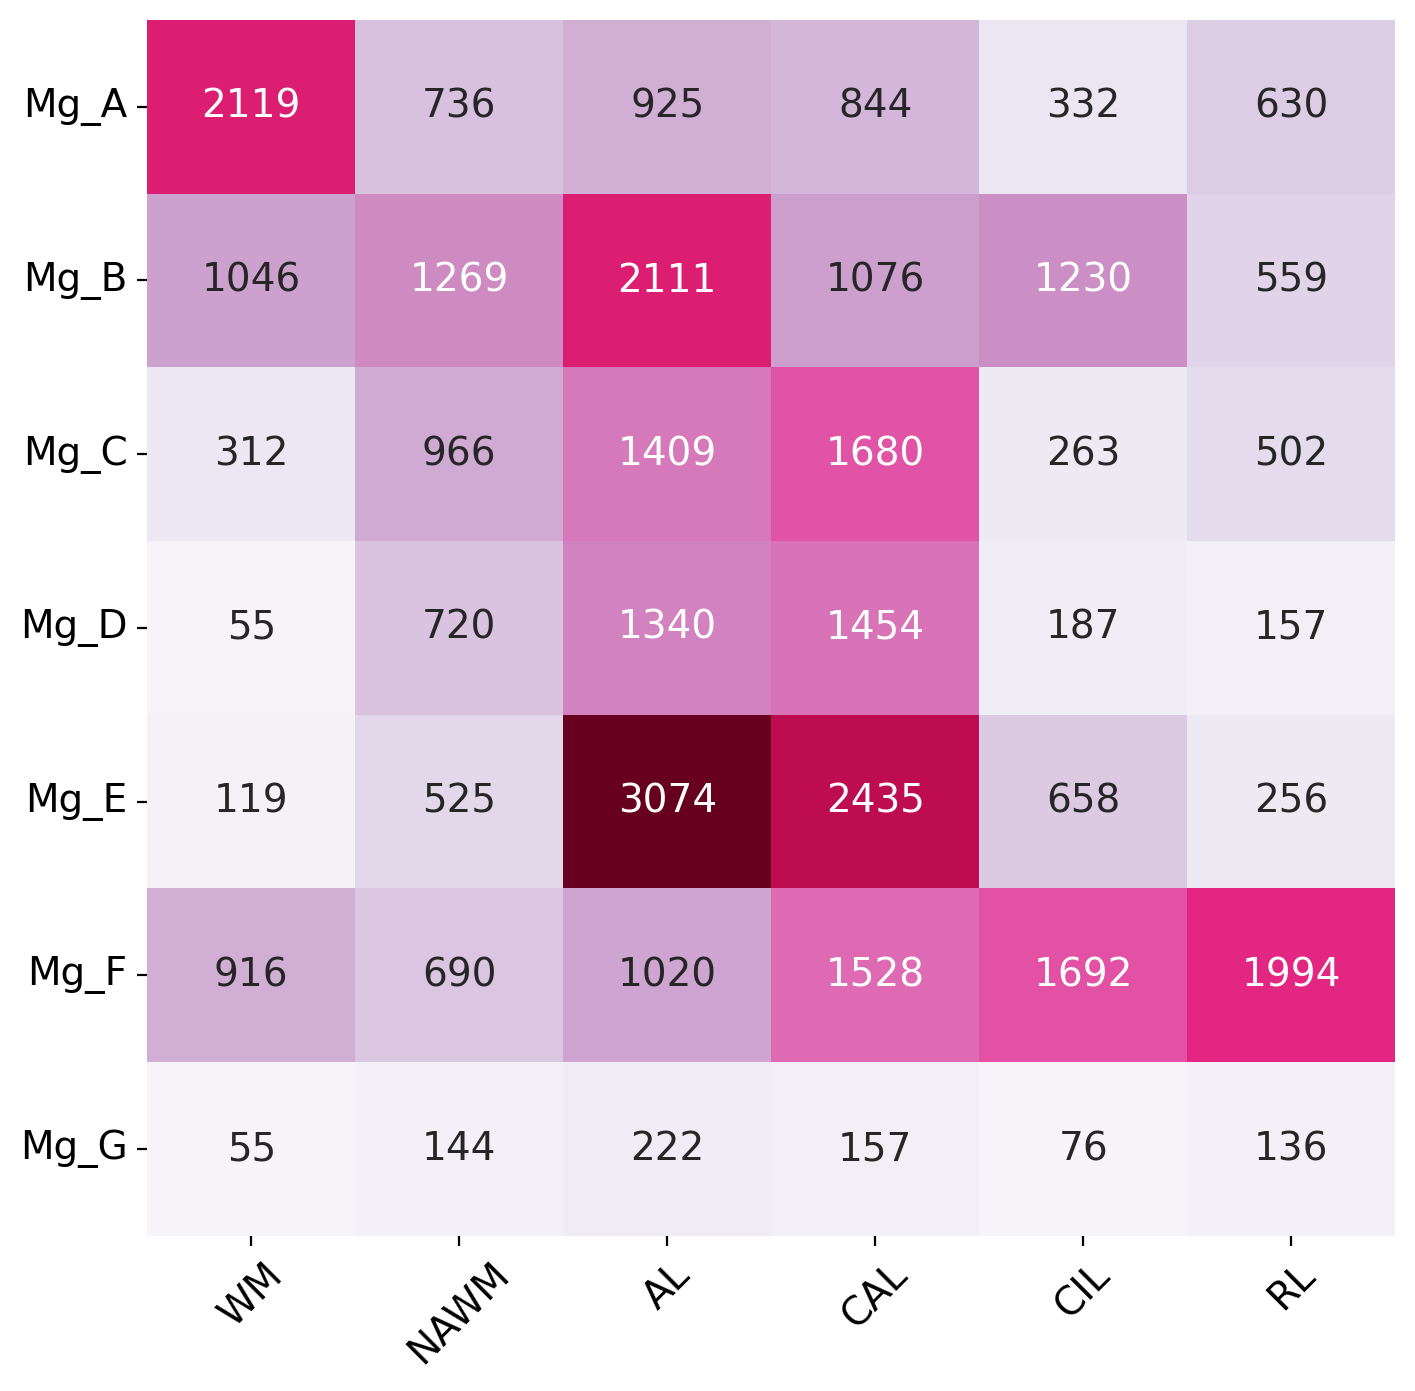

In [19]:
# Create the heatmap with larger fonts
plt.figure(figsize=(8, 8))  # Adjust the figure size to make it more square
ax = sb.heatmap(
    crosstab_df, 
    cmap="PuRd", 
    annot=True, 
    fmt="d", 
    cbar=False, 
    square=False,
    annot_kws={"size": 14}  # Increase annotation font size
)

# Remove grid lines
ax.grid(False)

# Remove axis labels (titles)
ax.set_xlabel(None)
ax.set_ylabel(None)

# Rotate tick labels for better visibility and increase font size
ax.tick_params(axis='x', rotation=45, labelsize=14)  # Increase x-axis tick label size
ax.tick_params(axis='y', rotation=0, labelsize=14)  # Increase y-axis tick label size

plt.savefig('./figures_MG/crosstab_cluster_annotation_vs_lesion_MG_big.png', dpi=300, bbox_inches='tight')

# Show the heatmap
plt.show()

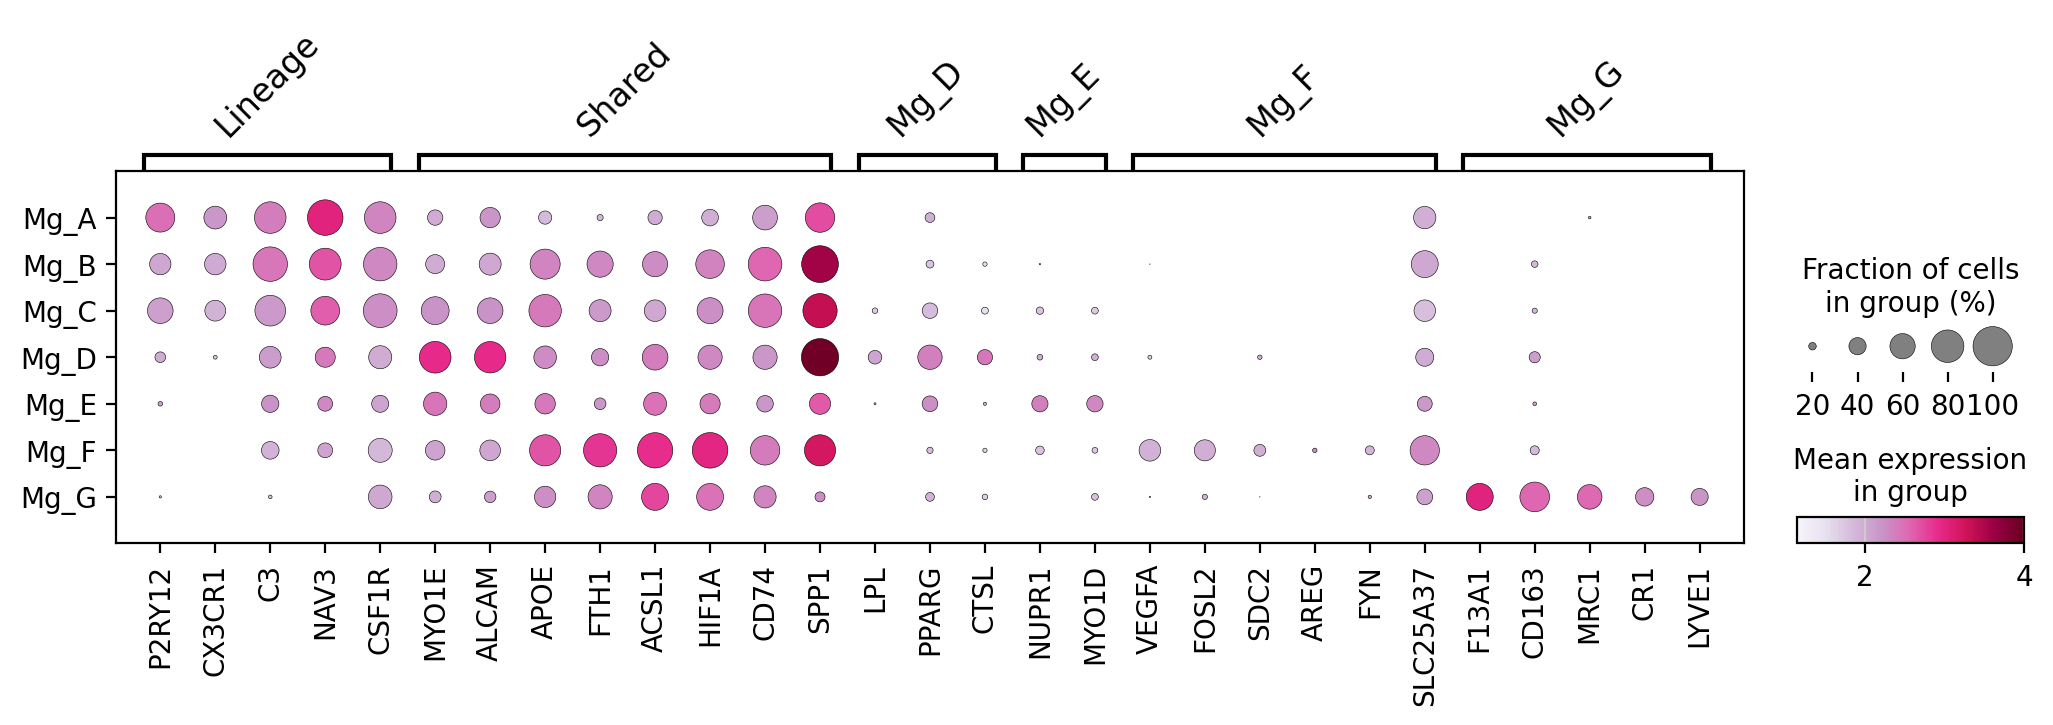

In [25]:
# Known marker genes with mouse gene names
marker_genes = {
    'Lineage':['P2RY12', 'CX3CR1', 'C3', 'NAV3', 'CSF1R'],
    'Shared': ['MYO1E', 'ALCAM', 'APOE', 'FTH1', 'ACSL1', 'HIF1A', 'CD74', 'SPP1'],
    'Mg_D': ['LPL', 'PPARG', 'CTSL'],
    'Mg_E': ['NUPR1', 'MYO1D'],
    'Mg_F': ['VEGFA', 'FOSL2', 'SDC2', 'AREG', 'FYN', 'SLC25A37'], 
    'Mg_G': ['F13A1', 'CD163', 'MRC1', 'CR1', 'LYVE1']
}

# Flatten the list of genes in marker_genes while maintaining order
all_genes = [gene for genes in marker_genes.values() for gene in genes]

# Correct var_group_positions based on marker_genes_mouse
var_group_positions = []
start = 0
for genes in marker_genes.values():
    end = start + len(genes) - 1  # Calculate the end index for the group
    var_group_positions.append((start, end))  # Add the start and end index to var_group_positions_mouse
    start = end + 1  # Update the start index for the next group
    
# Plot the dotplot with the corrected parameters
sc.pl.dotplot(
    adata_mg,
    groupby="MG_NEW_types_abbrev",
    var_names=all_genes,
    use_raw=False,
    log=False,
    layer='log1p_norm',
    dendrogram=False,
    var_group_positions=var_group_positions,
    var_group_labels=list(marker_genes.keys()),
    var_group_rotation=45,
    standard_scale=None,  # Set to None to disable standard scaling
    swap_axes=False,  # Keep genes on the x-axis and cell types on the y-axis
    cmap='PuRd',  # Choose a color map
    show=True,
    dot_min=0.1,
    vmax=4,
    mean_only_expressed=True,
    expression_cutoff=1,
    #save='MG_dot_plot_new.png'
)

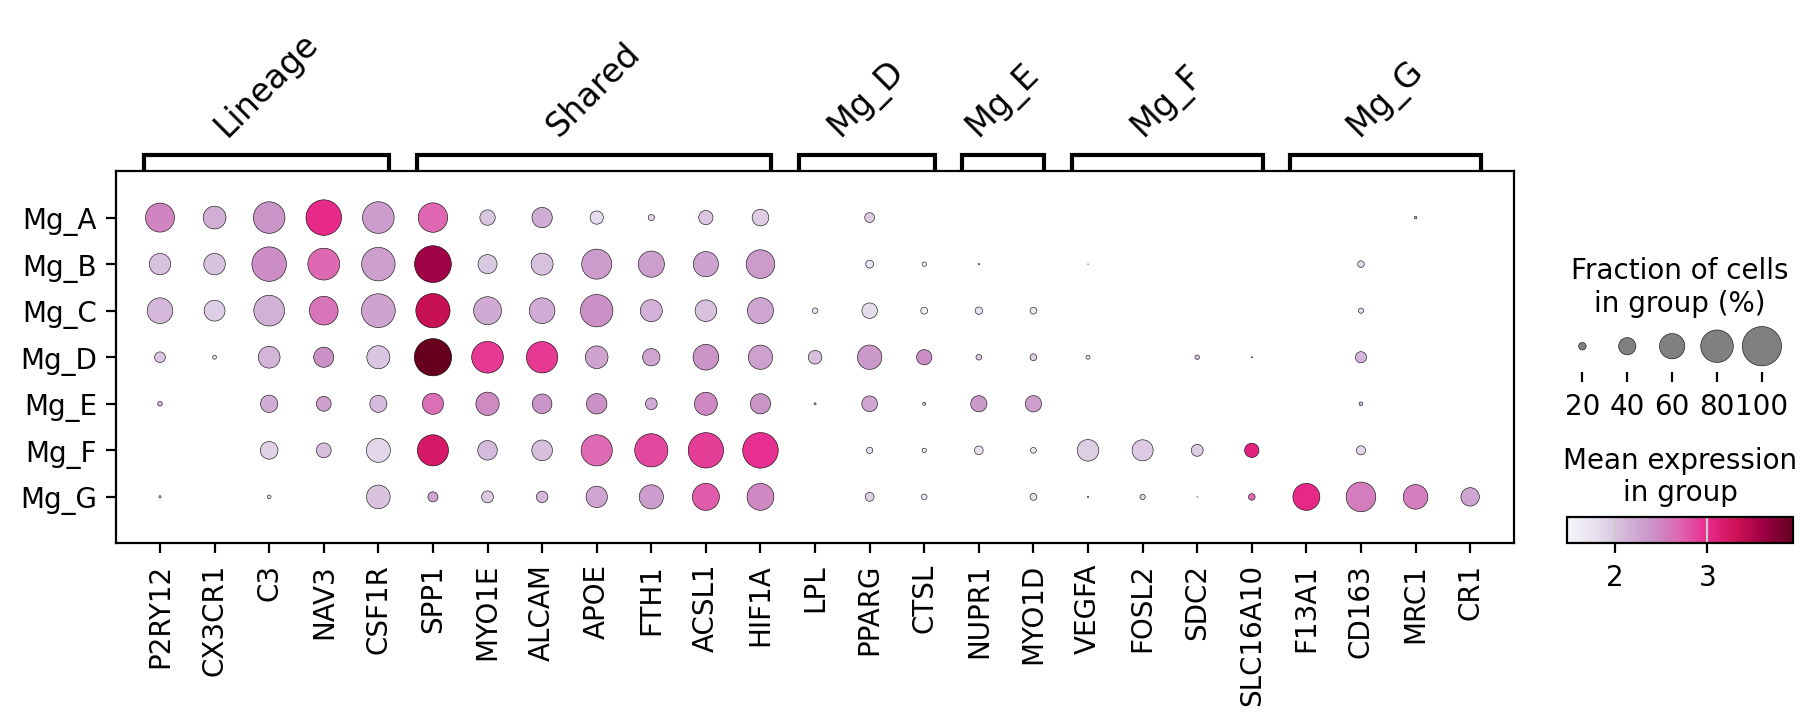

In [42]:
# Known marker genes with mouse gene names
marker_genes = {
    'Lineage':['P2RY12', 'CX3CR1', 'C3', 'NAV3', 'CSF1R'],
    'Shared': ['SPP1', 'MYO1E', 'ALCAM', 'APOE', 'FTH1', 'ACSL1', 'HIF1A'],
    'Mg_D': ['LPL', 'PPARG', 'CTSL'],
    'Mg_E': ['NUPR1', 'MYO1D'],
    'Mg_F': ['VEGFA', 'FOSL2', 'SDC2', 'SLC16A10'], 
    'Mg_G': ['F13A1', 'CD163', 'MRC1', 'CR1']
}

# Flatten the list of genes in marker_genes while maintaining order
all_genes = [gene for genes in marker_genes.values() for gene in genes]

# Correct var_group_positions based on marker_genes_mouse
var_group_positions = []
start = 0
for genes in marker_genes.values():
    end = start + len(genes) - 1  # Calculate the end index for the group
    var_group_positions.append((start, end))  # Add the start and end index to var_group_positions_mouse
    start = end + 1  # Update the start index for the next group
    
# Plot the dotplot with the corrected parameters
sc.pl.dotplot(
    adata_mg,
    groupby="MG_NEW_types_abbrev",
    var_names=all_genes,
    use_raw=False,
    log=False,
    layer='log1p_norm',
    dendrogram=False,
    var_group_positions=var_group_positions,
    var_group_labels=list(marker_genes.keys()),
    var_group_rotation=45,
    standard_scale=None,  # Set to None to disable standard scaling
    swap_axes=False,  # Keep genes on the x-axis and cell types on the y-axis
    cmap='PuRd',  # Choose a color map
    show=True,
    dot_min=0.1,
    #vmax=4,
    mean_only_expressed=True,
    expression_cutoff=1,
    save='MG_dot_plot_UPDATED.png'
)

In [20]:
# Group by 'treatment_meta' and 'cell_type_eval' to count cells
cell_type_counts = adata_mg.obs.groupby(['lesion_type', 'MG_NEW_types_abbrev']).size().reset_index(name='cell_count')

# Pivot the DataFrame to have treatments as index and cell types as columns
pivoted_counts = cell_type_counts.pivot(index='MG_NEW_types_abbrev', columns='lesion_type', values='cell_count').fillna(0)

# Add totals
total_cells = pivoted_counts.sum()

# Add percent
percent_counts = pivoted_counts.div(total_cells) * 100
percent_counts_transposed = percent_counts.transpose()
percent_counts_transposed

/tmp/1505707.1.gpu/ipykernel_245698/1091873409.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_mg.obs.groupby(['lesion_type', 'MG_NEW_types_abbrev']).size().reset_index(name='cell_count')


MG_NEW_types_abbrev       Mg_A       Mg_B       Mg_C       Mg_D       Mg_E  \
lesion_type                                                                  
WM                   45.845954  22.630896   6.750325   1.189961   2.574643   
NAWM                 14.574257  25.128713  19.128713  14.257426  10.396040   
AL                    9.157509  20.898921  13.949114  13.266013  30.432630   
CAL                   9.199913  11.728799  18.312623  15.849139  26.542402   
CIL                   7.480847  27.715187   5.926093   4.213610  14.826498   
RL                   14.879547  13.202645  11.856401   3.708077   6.046292   

MG_NEW_types_abbrev       Mg_F      Mg_G  
lesion_type                               
WM                   19.818260  1.189961  
NAWM                 13.663366  2.851485  
AL                   10.098010  2.197802  
CAL                  16.655766  1.711358  
CIL                  38.125282  1.712483  
RL                   47.094946  3.212093

In [21]:
# Define the desired order of treatments and cell types
desired_treatments_order = ['WM', 'NAWM', 'AL', 'CAL', 'CIL', 'RL']
desired_cell_types_order = ['Mg_A', 'Mg_B', 'Mg_C', 'Mg_D', 'Mg_E', 
                 'Mg_F', 'Mg_G']

# Reorder the columns and the index of the percent_counts DataFrame
percent_counts_reordered = percent_counts_transposed[desired_cell_types_order].reindex(desired_treatments_order)
percent_counts_reordered

MG_NEW_types_abbrev       Mg_A       Mg_B       Mg_C       Mg_D       Mg_E  \
lesion_type                                                                  
WM                   45.845954  22.630896   6.750325   1.189961   2.574643   
NAWM                 14.574257  25.128713  19.128713  14.257426  10.396040   
AL                    9.157509  20.898921  13.949114  13.266013  30.432630   
CAL                   9.199913  11.728799  18.312623  15.849139  26.542402   
CIL                   7.480847  27.715187   5.926093   4.213610  14.826498   
RL                   14.879547  13.202645  11.856401   3.708077   6.046292   

MG_NEW_types_abbrev       Mg_F      Mg_G  
lesion_type                               
WM                   19.818260  1.189961  
NAWM                 13.663366  2.851485  
AL                   10.098010  2.197802  
CAL                  16.655766  1.711358  
CIL                  38.125282  1.712483  
RL                   47.094946  3.212093

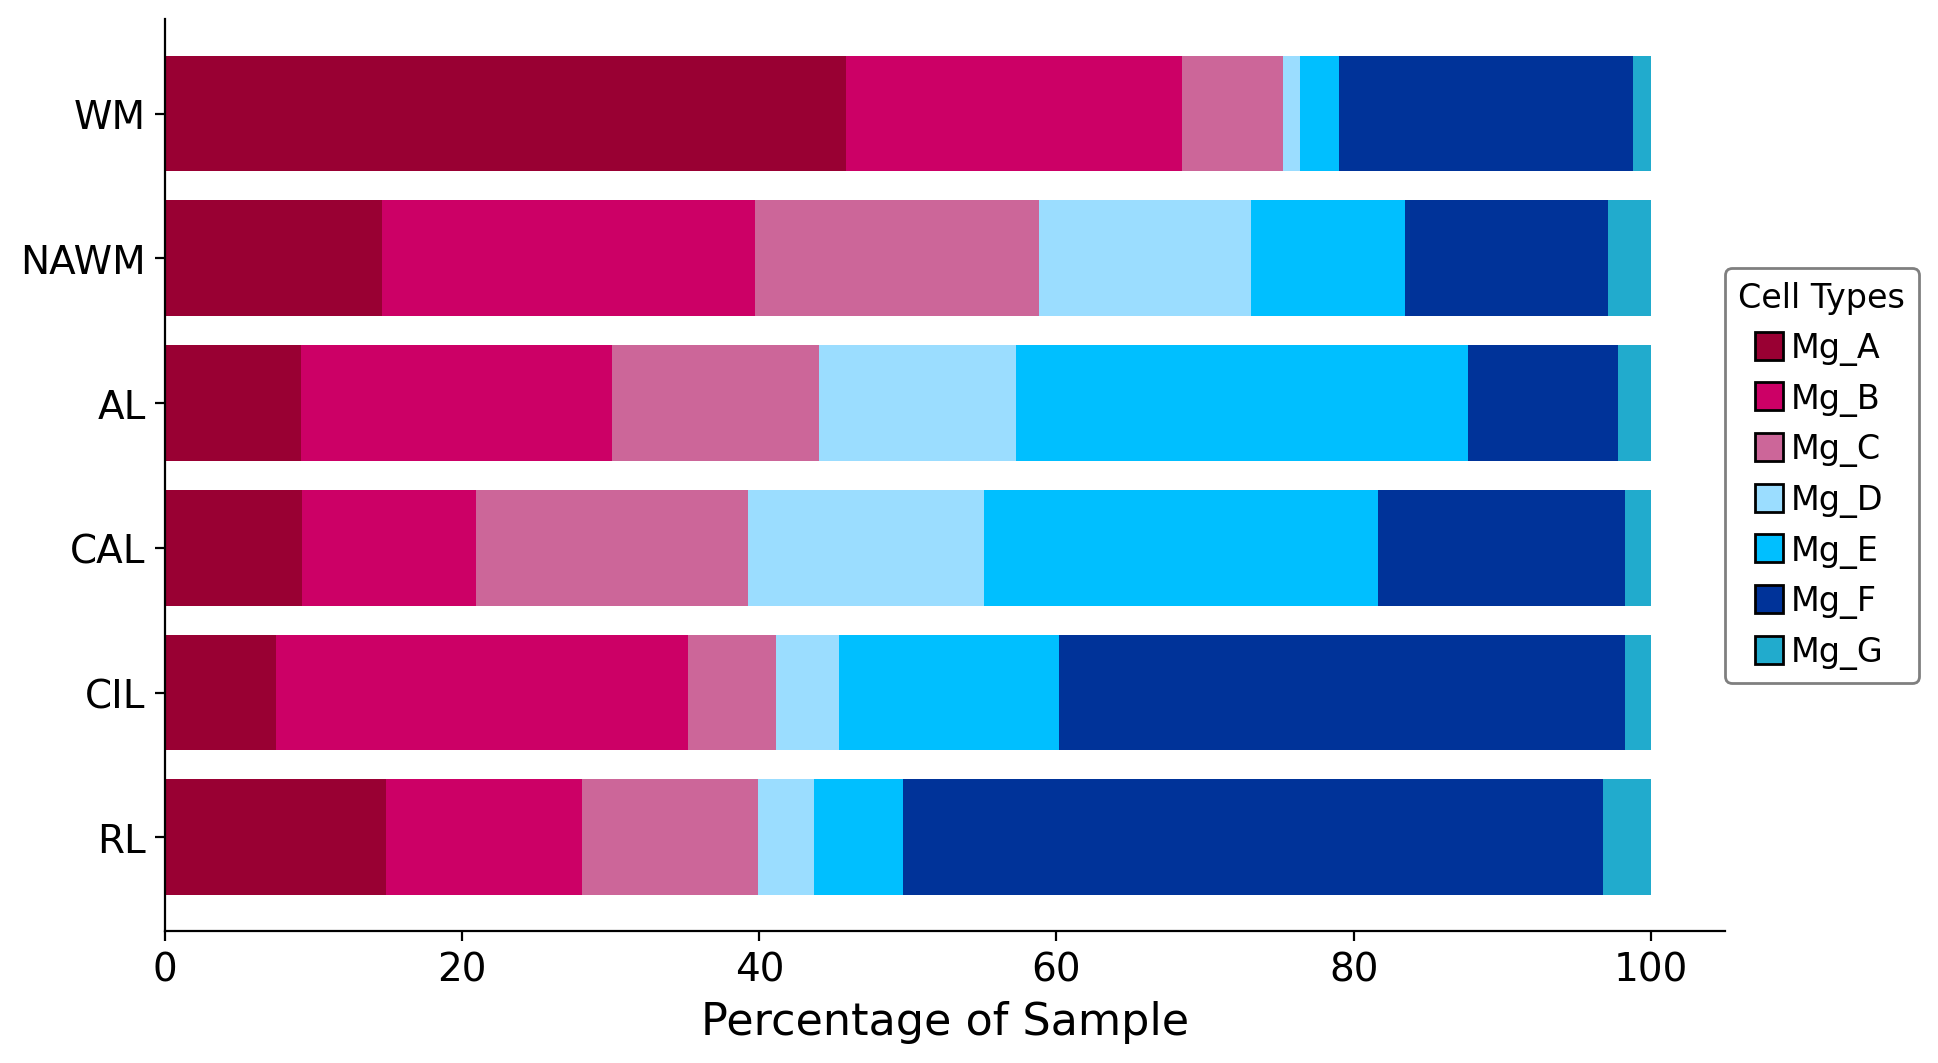

In [25]:
# Define the custom color map for the updated cell types, including 'Other'
custom_colors = {
    'Mg_A': '#990033', 
    'Mg_E': '#00bfff', 
    'Mg_F': '#003399', 
    'Mg_D': '#9bddff', 
    'Mg_B': '#cc0066', 
    'Mg_C': '#cc6699',
    'Mg_G': '#21abcd',
    #'Other': '#d3d3d3'  # Light grey for the 'Other' category
}

# Define the colors for the stacked bar chart in the order of desired_cell_types_order_updated
colors = [custom_colors[cell_type] for cell_type in desired_cell_types_order]

# Plot the horizontal stacked bar chart with custom colors
ax = percent_counts_reordered.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, width=0.8)

# Set the title and labels with increased font size
ax.set_xlabel('Percentage of Sample', fontsize=16)  # Increase font size

# Remove y-axis label
ax.set_ylabel('')  # Empty string to remove label

# Increase font size of ticks
plt.xticks(fontsize=14)  # Increase font size
plt.yticks(fontsize=14)  # Increase font size

# Invert the y-axis to reverse the order
ax.invert_yaxis()

# Remove grid lines
ax.grid(False)

# Remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Show only x and y axis lines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# Create legend with transparency
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=custom_colors[col], markersize=10, markeredgecolor='black') for col in percent_counts_reordered.columns]
#legend = ax.legend(legend_handles, percent_counts_reordered.columns, loc='lower center', fontsize=12, title='Cell Types')
legend = ax.legend(legend_handles, percent_counts_reordered.columns, loc='center left', fontsize=12, title='Cell Types', bbox_to_anchor=(1, 0.5), borderaxespad=0.)

# Set transparency of the legend
legend.get_frame().set_alpha(0.5)  # Set alpha value for transparency (0.5 makes it semi-transparent)

# Optionally, add a border color for contrast
legend.get_frame().set_edgecolor('black')  # Set border color of the legend

# Save the plot as a PNG file
plt.savefig('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/figures_MG/hs_MG_cell_types_stacked_barh4.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()